In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [2]:
def MakeThicknessList(ListPaths):
    Thickness = []
    for i in ListPaths:
        Thickness.append(int(i.split("/")[-1].split(".")[0]))
    Thickness = np.array(Thickness)
    return(Thickness)

def OpenTxt(Path):
    with open(Path) as textFile:
        lines = [line.split() for line in textFile]
    List = []
    for i in lines:
        List.append(i[0])
    return(List)

DataPath = "/home/ug-ml/felix-ML/classification/Classification000/DataPaths/"

TrainPath = OpenTxt(DataPath + "Train_0p1.txt")
ValPath = OpenTxt(DataPath + "Validation_0p1.txt")
TestPath = OpenTxt(DataPath + "Test_0p1.txt")

TrainThickness = MakeThicknessList(TrainPath)
ValThickness = MakeThicknessList(ValPath)
TestThickness = MakeThicknessList(TestPath)

AllPaths = [TrainPath, ValPath, TestPath]

In [3]:
def LoadCentralBeam(AllPaths):
    TrainImages = np.zeros(128 * 128 * len(AllPaths[0]), dtype = np.float).reshape(len(AllPaths[0]), 128, 128)
    ValImages = np.zeros(128 * 128 * len(AllPaths[1]), dtype = np.float).reshape(len(AllPaths[1]), 128, 128)
    TestImages = np.zeros(128 * 128 * len(AllPaths[2]), dtype = np.float).reshape(len(AllPaths[2]), 128, 128)
    
    AllImages = [TrainImages, ValImages, TestImages]
    
    for i in range(0, len(AllImages)):
        for j in range(0, len(AllImages[i])):
            print(j)
            AllImages[i][j] = np.load(AllPaths[i][j])[0]
    return AllImages

def CreateCompareMatrix(AllImages):
    NumImages = [len(AllImages[0]), len(AllImages[1]), len(AllImages[2])]
    ValTrain_M = np.zeros(NumImages[0] * NumImages[1], dtype = np.float).reshape(NumImages[1], NumImages[0])
    TestTrain_M = np.zeros(NumImages[0] * NumImages[2], dtype = np.float).reshape(NumImages[2], NumImages[0])
    
    for i in range(0, NumImages[1]):
        print(i)
        for j in range(0, NumImages[0]):
            ValTrain_M[i][j] = np.sum(np.square(AllImages[0][j] - AllImages[1][i]))
    
    for i in range(0, NumImages[2]):
        print(i)
        for j in range(0, NumImages[0]):
            TestTrain_M[i][j] = np.sum(np.square(AllImages[0][j] - AllImages[2][i]))
    return(ValTrain_M, TestTrain_M)

In [4]:
AllImages = LoadCentralBeam(AllPaths)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160


3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812


5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528


7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267


KeyboardInterrupt: 

In [ ]:
ValTrain_M, TestTrain_M = CreateCompareMatrix(AllImages)

In [ ]:
np.save("ValTrain_M1", ValTrain_M)
np.save("TestTrain_M1", TestTrain_M)

In [4]:
ValTrain_M = np.load("/home/ug-ml/Documents/GitHub_BigFiles/MostSimilarClassification/ValTrain_M.npy")
TestTrain_M = np.load("/home/ug-ml/Documents/GitHub_BigFiles/MostSimilarClassification/TestTrain_M.npy")

In [5]:
def AccuracyPrediction(Matrix):
    accuracy = 0
    rms = 0
    
    CorrectClass = np.zeros(len(Matrix), dtype = np.int)
    PredictedClass = np.zeros(len(Matrix), dtype = np.int)
    
    for i in range(0, len(Matrix)):
        j = np.argmin(Matrix[i])
        CorrectClass[i] = i % 9 + 1
        PredictedClass[i] = j % 9 + 1
        if(CorrectClass[i] == PredictedClass[i]):
            accuracy+=1
        rms += (PredictedClass[i] - CorrectClass[i]) ** 2

    rms = (rms / len(Matrix)) ** 0.5
    accuracy = (accuracy / len(Matrix)) * 100
    print(accuracy , rms)
    return(accuracy, rms, CorrectClass, PredictedClass)

accuracy_val, rms_val, CorrectClass_val, PredictedClass_val = AccuracyPrediction(ValTrain_M)
accuracy_test, rms_test, CorrectClass_test, PredictedClass_test = AccuracyPrediction(TestTrain_M) 

74.42489851150202 1.6923594740435777
72.62653489068583 1.8488075206137409


In [6]:
#Test Data Scaling
fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

train_indexes = np.load("/home/ug-ml/tmp_git/FelixML_New/misc_programs/classification/train_indexes1.npy").astype(np.int)
val_indexes = np.load("/home/ug-ml/tmp_git/FelixML_New/misc_programs/classification/val_indexes1.npy").astype(np.int)
test_indexes = np.load("/home/ug-ml/tmp_git/FelixML_New/misc_programs/classification/test_indexes1.npy").astype(np.int)

def AccuracyPredictionScaleing(Matrix, train_indexes, comp_indexes, fraction):
    NoTrain = int(len(train_indexes) * fraction)
    NoComp = int(len(comp_indexes) * fraction)
    ReducedM = np.zeros(NoTrain * NoComp, dtype = np.float).reshape(NoComp, NoTrain)
    
    for i in range(0, NoComp):
        for j in range(0, NoTrain):
            ReducedM[i][j] = Matrix[comp_indexes[i]][train_indexes[j]]
    
    acc, rms, A, B = AccuracyPrediction(ReducedM)
    #print(acc, rms, fraction)
    return(acc, rms)

for i in fractions:
    print(i)
    acc, rms = AccuracyPredictionScaleing(TestTrain_M, train_indexes, test_indexes, i)



0.1
47.74774774774775 2.754194180805991
0.2
51.424287856071956 2.583246681656797
0.3
55.14485514485514 2.5244063406328574
0.4
64.11985018726591 2.2300299791404528
0.5
65.36848412222888 2.1829175017971902
0.6
66.40039940089866 2.119495602163075
0.7
68.6777920410783 1.9933565313356263
0.8
69.67427929614377 1.9386896113638288
0.9
71.61397670549084 1.8735393645226603
1.0
72.62653489068583 1.8488075206137409


In [7]:
Accuracy_val = np.array(100 * Bin_Num_val / len(ValThickness))
plt.bar(Bin_Vals_val, Accuracy_val, label = "Perfomance")
print(Bin_Vals_val)
plt.xlabel('Difference')

plt.ylabel('% of total')
plt.title('Frequency of differences for the Validation')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()


Accuracy_test = np.array(100 * Bin_Num_test / len(TestThickness))
plt.bar(Bin_Vals_test, Accuracy_test, label = "Perfomance")
print(Bin_Vals_test)
plt.xlabel('Difference')

plt.ylabel('% of total')
plt.title('Frequency of differences for the Test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()


#Save Bin difference
BinDiff_path = "/home/ug-ml/tmp_git/FelixML_New/data_analysis/classification/Graphs/Bin_Difference/"
np.savetxt(BinDiff_path + "MS_Bin_Value_test_x_rms", Bin_Vals_test)
np.savetxt(BinDiff_path + "MS_Accuracy_test_y_rms", Accuracy_test)

NameError: name 'Bin_Num_val' is not defined

In [8]:
def WhichCifs(Paths):
    CifBasePath = Paths[0].split("Data")[0] + "CifFolder/"
    CifPaths = []
    for i in range(0, int(len(Paths) / 9)):
        crystal_i = int(Paths[i * 9].split("/")[-2])
        CifPaths.append(CifBasePath + str(crystal_i) + ".cif")
    
    return(CifPaths)

    

def LoadAllCif(Path):
    CifInfo = []
    for i in Path:
        with open(i) as textFile:
            lines = [line.split() for line in textFile]

        for j in lines:
            for k in range(0, len(j)):
                if(j[k] == "_cell_length_a"):
                    lattice_a = float(j[k + 1].split("(")[0])
                    print(lattice_a)
                
                if(j[k] == "_symmetry_Int_Tables_number"):
                    spacegroup = j[k+1]
                    print(spacegroup)
                    print("")
                    CifInfo.append([lattice_a, spacegroup])
                    break
    return(CifInfo)

def IsInList(List, Value):
    if(len(List) == 0):
        return(False)
    else:
        for i in List:
            if(i == Value):
                return True
    return False

def ArgInList(List, Value):
    for i in range(0, len(List)):
        if(List[i] == Value):
            return(i)
    return(None)


def SpaceGroupInfo(CifInfo):
    ListSpaceGroup = []
    for i in CifInfo:
        spacegroup = i[1]
        if(IsInList(ListSpaceGroup, spacegroup) == False):
            ListSpaceGroup.append(spacegroup)
    ListSpaceGroup = sorted(ListSpaceGroup)
    NumberSpaceGroup = len(ListSpaceGroup)
    HistSpaceGroup = np.zeros(NumberSpaceGroup, dtype = np.int)
    
    for i in CifInfo:
        spacegroup = i[1]
        arg = 0
        for j in range(0, NumberSpaceGroup):
            if(ListSpaceGroup[j] == spacegroup):
                arg = j
                break
        HistSpaceGroup[j]+=1
        
    
    return(ListSpaceGroup, HistSpaceGroup)

def LatticeSizeInfo(CifInfo):
    minsize = np.inf
    maxsize = -np.inf
    for i in CifInfo:
        if(i[0] < minsize):
            minsize = i[0]
        elif(i[0] > maxsize):
            maxsize = i[0]
            
    NumberLattice = int(np.floor(maxsize) - np.floor(minsize) + 1)
    LatticeHist = np.zeros(NumberLattice, dtype = np.int)
    for i in CifInfo:
        index = int(np.floor(i[0]) - np.floor(minsize))
        LatticeHist[index]+=1
    
    return([minsize, maxsize], LatticeHist)


CifPaths_test = WhichCifs(TestPath)
CifInfo_test = LoadAllCif(CifPaths_test)

ListSpaceGroup_test, HistSpaceGroup_test = SpaceGroupInfo(CifInfo_test)
LatticeRange_test, LatticeHist_test = LatticeSizeInfo(CifInfo_test)


CifPaths_val = WhichCifs(ValPath)
CifInfo_val = LoadAllCif(CifPaths_val)

ListSpaceGroup_val, HistSpaceGroup_val = SpaceGroupInfo(CifInfo_val)
LatticeRange_val, LatticeHist_val = LatticeSizeInfo(CifInfo_val)

7.656
204

7.43
204

9.606
204

7.9743
204

7.738
204

10.2501
197

7.3727
204

11.79
204

10.0194
204

9.0713
204

7.2228
204

7.7112
204

7.428
204

9.136
204

9.142
204

10.217
197

14.096
204

9.3887
204

7.3877
204

8.08
204

7.33892
204

7.40704
204

7.2749
204

7.36636
204

8.098
204

15.3982
204

13.319
197

9.06361
204

7.3925
204

9.1036
204

15.33
204

8.173
205

11.3
205

12.4
205

5.788
205

12.492
205

12.322
205

5.6765
205

8.6311
205

8.7987
205

14.2502
205

12.393
205

12.328
205

10.22
205

15.65
205

7.944
205

14.095
205

9.1022
205

12.585
205

13.1075
205

13.234
205

12.3738
205

10.5685
205

6.074419
205

9.4146
206

6.64
206

9.85
206

10.927
206

10.809
206

13.069
197

10.682
206

10.628
206

10.597
206

10.448
206

10.4345
206

10.606
206

10.7716
206

10.6965
206

9.324
206

9.27
206

10.13
206

10.88126
206

10.9295
206

10.8906
206

10.6452
206

10.82601
206

6.363
198

10.3637
206

9.5565
206

8.3687
212

8.3339
212

4.674
198

8.1733
212

6.3
213

11.

9.0437
223

10.69994
223

10.7106
223

10.6695
223

12.7779
200

10.6747
223

10.6766
223

10.5397
223

11.045
223

10.7056
223

12.46
200

10.3525
223

9.698
223

9.773
223

10.6926
223

10.5028
223

11.685
223

12.1464
223

10.5179
223

10.6798
223

10.6306
223

9.581
223

10.278
223

11.8404
223

10.2858
223

5.7299
200

11.0614
223

10.6096
223

10.7548
223

10.7535
223

10.8555
223

10.9539
223

10.7908
223

10.6742
223

9.5661
223

11.9447
223

12.7106
223

10.8203
223

9.0586
223

10.6245
200

10.7653
223

10.7488
223

8.278
200

10.708
223

10.734
223

10.2701
223

10.7973
200

10.2652
223

10.5821
223

7.79
224

8.135
224

4.728
224

11.5621
224

4.94
224

4.95
224

6.3
224

4.7243
224

11.6956
224

9.4448
224

9.4812
224

9.5875
200

6.3022
224

5.9782
224

10.571
225

8.1511
225

5.563
225

9.928
225

4.3
225

11.959
225

14.364
200

6.128
225

10.093
225

5.582
225

15.012
225

8.623
225

8.3204
225

14.35
200

9.302
201

9.7525
225

5.565
225

6.288
225

13.3
225

5.5203
2

In [9]:
#print(LatticeHist_test)
#print(LatticeRange_test)

def BinLattice(OutputAverage, Thickness, LatticeRange, LatticeHist, CifInfo):
    Diff = OutputAverage - Thickness
    LatticeHist = LatticeHist * 9
    
    
    min_lattice = math.floor(LatticeRange[0])
    max_lattice = math.floor(LatticeRange[1])
    
    NoBins = max_lattice - min_lattice + 1
    
    bin_size = (max_lattice - min_lattice) / NoBins
    Bin_values = ((np.arange(NoBins, dtype = np.float32) / (NoBins - 1))) * (max_lattice - min_lattice) + min_lattice
    
    Bin_Diff = np.zeros(NoBins, dtype = np.float32)
    Bin_Acc = np.zeros(NoBins, dtype = np.float32)
    
    for i in range(0, len(Diff)):
        cif_i = math.floor(i / 9)
        index = int(np.floor(CifInfo[cif_i][0]) - min_lattice)
        
        Bin_Acc[index]+=Diff[i] ** 2
        
        
        Bin_Diff[index]+=Diff[i]
    
    for i in range(0, NoBins):
        Bin_Diff[i] = Bin_Diff[i] / LatticeHist[i]
        Bin_Acc[i] = (Bin_Acc[i] / LatticeHist[i]) ** 0.5
    
    return(Bin_Diff, Bin_Acc, Bin_values)

BinLattice_Diff_val, BinLattice_Acc_val, BinLattice_values_val = BinLattice(PredictedClass_val, CorrectClass_val, LatticeRange_val, LatticeHist_val, CifInfo_val)
BinLattice_Diff_test, BinLattice_Acc_test, BinLattice_values_test = BinLattice(PredictedClass_test, CorrectClass_test, LatticeRange_test, LatticeHist_test, CifInfo_test)


[ 24  36  39  31  59 114  95 145  59  80  23  20  14]


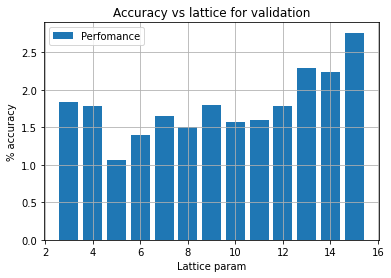

[ 24  36  39  31  59 114  95 145  59  80  23  20  14]


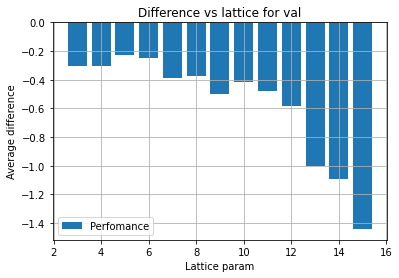

[ 7 16 19 31 32 53 45 67 32 39 13 12  5]


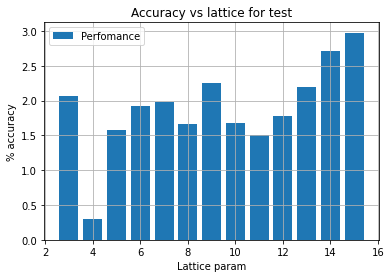

[ 7 16 19 31 32 53 45 67 32 39 13 12  5]


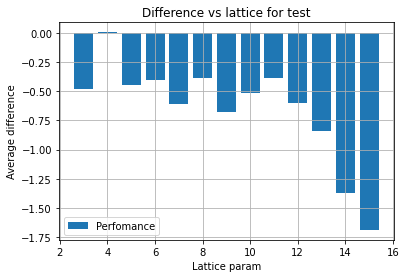

In [14]:
plt.bar(BinLattice_values_val, BinLattice_Acc_val, label = "Perfomance")
print(LatticeHist_val)
plt.xlabel('Lattice param')

plt.ylabel('% accuracy')
plt.title('Accuracy vs lattice for validation')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

plt.bar(BinLattice_values_val, BinLattice_Diff_val, label = "Perfomance")
print(LatticeHist_val)
plt.xlabel('Lattice param')

plt.ylabel('Average difference')
plt.title('Difference vs lattice for val')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()





plt.bar(BinLattice_values_test, BinLattice_Acc_test, label = "Perfomance")
print(LatticeHist_test)
plt.xlabel('Lattice param')

plt.ylabel('% accuracy')
plt.title('Accuracy vs lattice for test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

plt.bar(BinLattice_values_test, BinLattice_Diff_test, label = "Perfomance")
print(LatticeHist_test)
plt.xlabel('Lattice param')

plt.ylabel('Average difference')
plt.title('Difference vs lattice for test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()



#Save Bin Lattice
BinLattice_path = "/home/ug-ml/tmp_git/FelixML_New/data_analysis/classification/Graphs/Bin_Lattice/"
np.savetxt(BinLattice_path + "MS_Bin_Lattice_test_x1_rms", BinLattice_values_test)
np.savetxt(BinLattice_path + "MS_Acc_test_y1_rms", BinLattice_Acc_test)
np.savetxt(BinLattice_path + "MS_Diff_test_y2_rms", BinLattice_Diff_test)


np.savetxt(BinLattice_path + "Classification_NoInEachLattice_rms", LatticeHist_test)

In [12]:
def BinSpaceGroup(OutputAverage, Thickness, ListSpaceGroup, HistSpaceGroup, CifInfo):
    Diff = OutputAverage - Thickness
    HistSpaceGroup = HistSpaceGroup * 9
    
    NoBins = len(ListSpaceGroup)
    
    Bin_Diff = np.zeros(NoBins, dtype = np.float32)
    Bin_Acc = np.zeros(NoBins, dtype = np.float32)
    

    for i in range(0, len(Diff)):
        cif_i = math.floor(i / 9)
        index = ArgInList(ListSpaceGroup, CifInfo[cif_i][1])
        
        Bin_Acc[index]+=Diff[i] ** 2
        
        Bin_Diff[index]+=Diff[i]
    
    
    
    for i in range(0, NoBins):
        Bin_Diff[i] = Bin_Diff[i] / HistSpaceGroup[i]
        Bin_Acc[i] = (Bin_Acc[i] / HistSpaceGroup[i]) ** 0.5
        
    
    
    return(Bin_Diff, Bin_Acc)

BinSG_Diff_val, BinSG_Acc_val = BinSpaceGroup(PredictedClass_val, CorrectClass_val, ListSpaceGroup_val, HistSpaceGroup_val, CifInfo_val)
BinSG_Diff_test, BinSG_Acc_test = BinSpaceGroup(PredictedClass_test, CorrectClass_test, ListSpaceGroup_test, HistSpaceGroup_test, CifInfo_test)

[12 20 15 15 17  1 55 44 44 17 18 23 30 50 38 48 54 49 13 37 15 33 44 47]


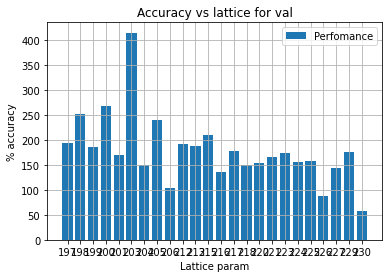

[12 20 15 15 17  1 55 44 44 17 18 23 30 50 38 48 54 49 13 37 15 33 44 47]


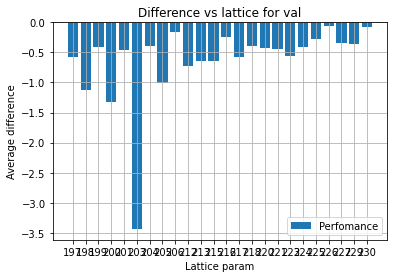

[ 6 15  2  9  6 28 23 23  3 13 12 19 30 26 19 22 20  2 23 10 21 17 22]


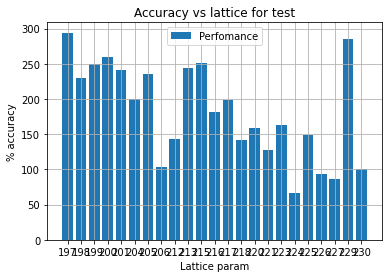

[ 6 15  2  9  6 28 23 23  3 13 12 19 30 26 19 22 20  2 23 10 21 17 22]


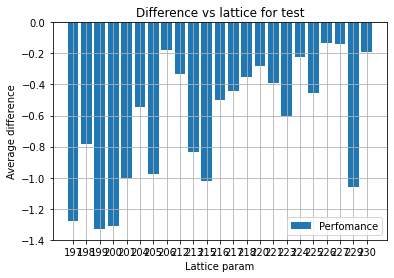

In [15]:
plt.bar(ListSpaceGroup_val, 100 * BinSG_Acc_val, label = "Perfomance")
print(HistSpaceGroup_val)
plt.xlabel('Lattice param')

plt.ylabel('% accuracy')
plt.title('Accuracy vs lattice for val')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

plt.bar(ListSpaceGroup_val, BinSG_Diff_val, label = "Perfomance")
print(HistSpaceGroup_val)
plt.xlabel('Lattice param')

plt.ylabel('Average difference')
plt.title('Difference vs lattice for val')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()




plt.bar(ListSpaceGroup_test, 100 * BinSG_Acc_test, label = "Perfomance")
print(HistSpaceGroup_test)
plt.xlabel('Lattice param')

plt.ylabel('% accuracy')
plt.title('Accuracy vs lattice for test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

plt.bar(ListSpaceGroup_test, BinSG_Diff_test, label = "Perfomance")
print(HistSpaceGroup_test)
plt.xlabel('Lattice param')

plt.ylabel('Average difference')
plt.title('Difference vs lattice for test')
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

#Save Bin SpaceGroup
SpaceGroup_path = "/home/ug-ml/tmp_git/FelixML_New/data_analysis/classification/Graphs/Bin_SG/"
np.savetxt(SpaceGroup_path + "MS_Bin_SG_test_x_rms", ListSpaceGroup_test, fmt='%s')
np.savetxt(SpaceGroup_path + "MS_Acc_test_y1_rms", BinSG_Acc_test)

np.savetxt(SpaceGroup_path + "MS_Diff_test_y2_rms", BinSG_Diff_test)

np.savetxt(SpaceGroup_path + "Classification_NoInEachSG_rms", HistSpaceGroup_test)